In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

Load Dataset

In [150]:
df=pd.read_csv("Data_Train.csv")

In [151]:
df.shape

(10683, 11)

In [152]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [153]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [154]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [156]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [157]:
df.dropna(inplace=True)

In [158]:
df['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

**Feature Engineering**

In [159]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [160]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [161]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [162]:
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [163]:
# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"], format="%H:%M").dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"], format="%H:%M").dt.minute

In [164]:
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [165]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [166]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour


C:\Users\91773\AppData\Local\Temp\ipykernel_18092\3381640237.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour


In [167]:
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

C:\Users\91773\AppData\Local\Temp\ipykernel_18092\2498861073.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute


In [ ]:
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [169]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
# Time taken by plane to reach destination is called Duration
# It is the difference betwwen Departure Time and Arrival time
# Assigning and converting Duration column into list
duration_hours = []
duration_mins = []

for time in df["Duration"]:
    parts = time.split()
    if len(parts) == 1:
        if "h" in parts[0]:
            parts.append("0m") 
        else:
            parts.insert(0, "0h")

    hours = int(parts[0].replace("h", "")) 
    mins = int(parts[1].replace("m", ""))

    duration_hours.append(hours)
    duration_mins.append(mins)

# Add new columns to DataFrame
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins


In [171]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [172]:
df.drop(["Duration"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


<Axes: >

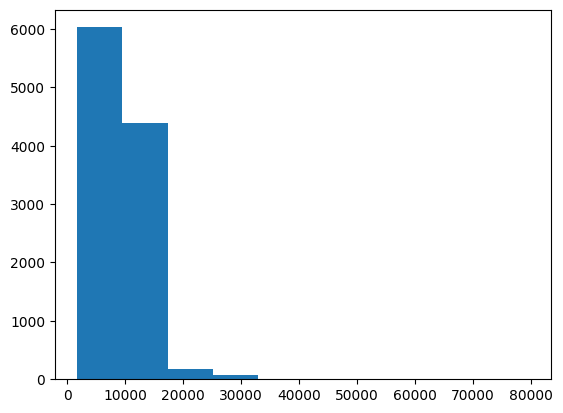

In [173]:
# Distribution of Prices
df['Price'].hist(grid=False)

Outlier Detection

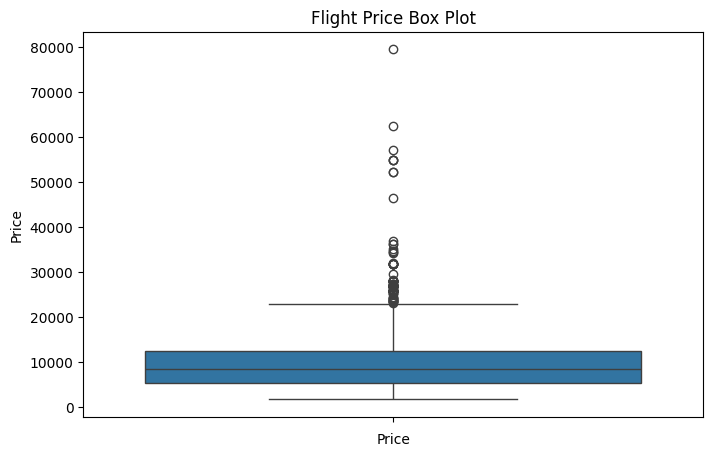

In [174]:
# Create a box plot to identify outliers
plt.figure(figsize=(8, 5))
sns.boxplot(df['Price'])
plt.title("Flight Price Box Plot")
plt.xlabel("Price")
plt.show()

**Handling Categorical Data**

In [175]:
df["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

C:\Users\91773\AppData\Local\Temp\ipykernel_18092\3467988525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False),kind="boxen", height = 6, aspect = 3,palette="Set2")


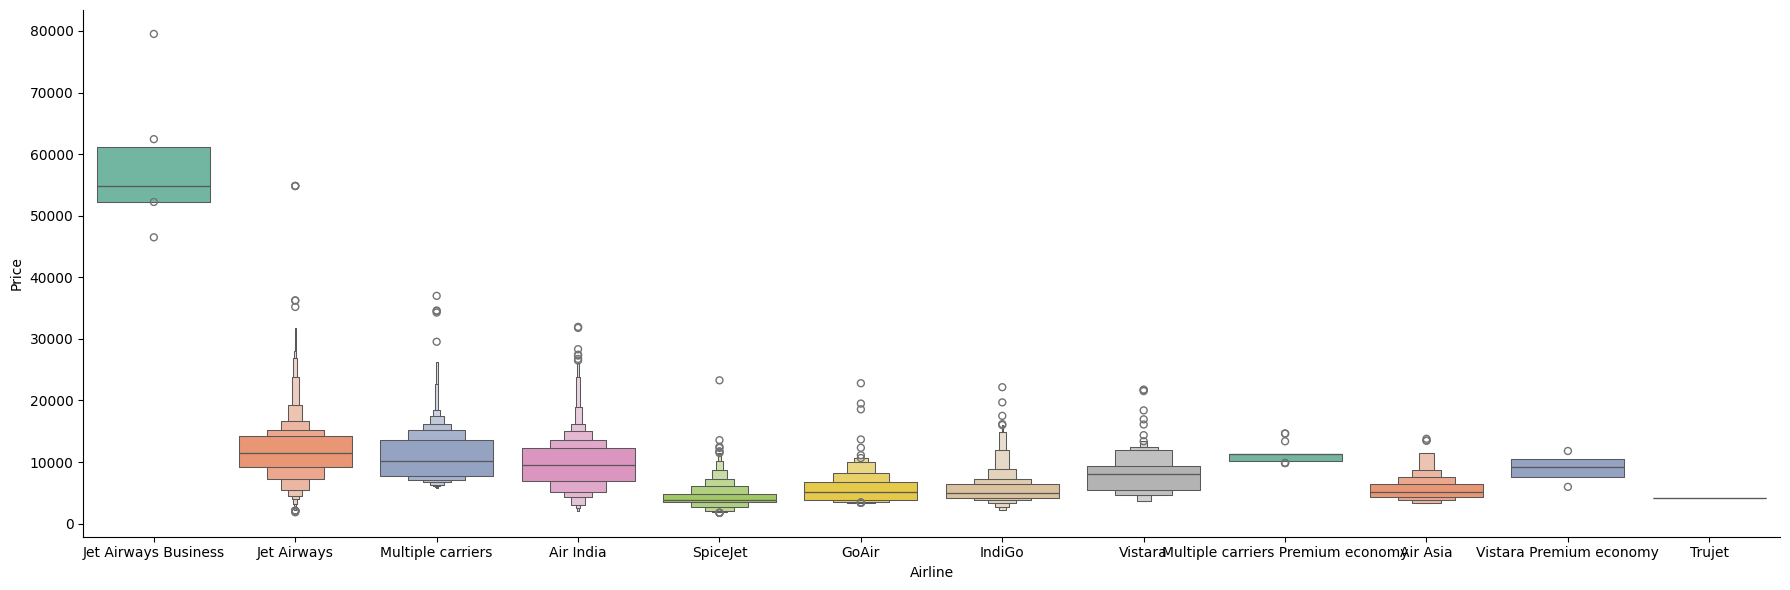

In [176]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False),kind="boxen", height = 6, aspect = 3,palette="Set2")
plt.show()

From graph we can see that Jet Airways Business have the highest Price.

Apart from the first Airline almost all are having similar median

In [ ]:

categories_list = ['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet', 
                   'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy', 
                   'Jet Airways Business', 'Vistara Premium economy', 'Trujet']

df['Airline'] = df['Airline'].astype(pd.CategoricalDtype(categories=categories_list))
Airline= pd.get_dummies(df['Airline']).astype(int)
Airline.head()


,Jet Airways,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Multiple carriers Premium economy,Jet Airways Business,Vistara Premium economy,Trujet
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0


In [178]:
df["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [ ]:
summary_stats = df.groupby('Source')['Price'].agg(count='count',mean='mean',min='min',max='max',std='std').reset_index()
print(summary_stats)


     Source  count          mean   median   min    max          std
0  Banglore   2197   8017.464269   6121.0  3257  79512  5964.303079
1   Chennai    381   4789.892388   3850.0  3145  19630  2190.219021
2     Delhi   4536  10540.113536  10262.0  3876  52285  3782.092549
3   Kolkata   2871   9158.389411   9345.0  3480  31945  3741.997070
4    Mumbai    697   5059.708752   3342.0  1759  25139  4100.504092


Delhi has the highest prices due to high demand and a focus on premium services.

Chennai offers the lowest prices, targeting budget-conscious consumers.

Bangalore shows significant price variability, catering to both low-cost and high-end travelers.

Kolkata has high average prices, indicating a strong demand for premium offerings.

Mumbai reflects moderate pricing, serving a mix of customers.

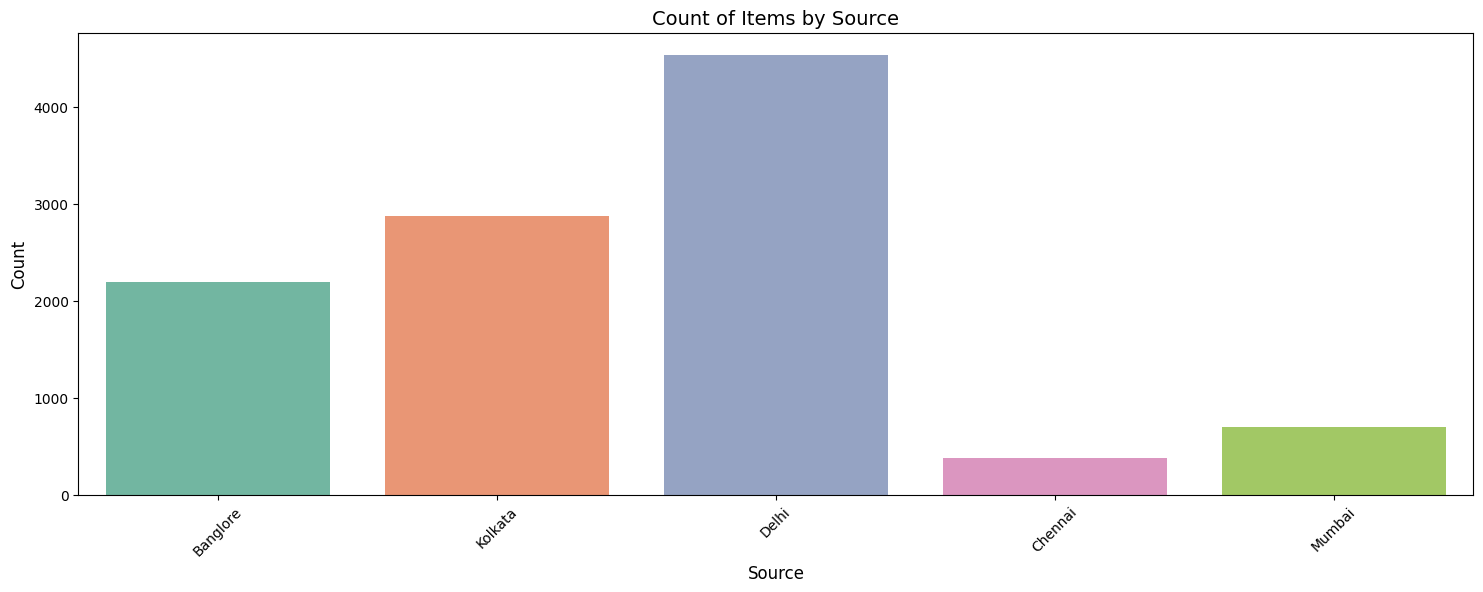

In [180]:
plt.figure(figsize=(18, 6))
sns.countplot(x="Source", data=df, hue="Source", palette="Set2", legend=False)
plt.xticks(rotation=45)
plt.title("Count of Items by Source", fontsize=14)
plt.xlabel("Source", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [ ]:
categories_list = ['Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Bangalore']
df['Source'] = df['Source'].astype(pd.CategoricalDtype(categories=categories_list))
Source = pd.get_dummies(df['Source']).astype(int)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai,Bangalore
0,0,0,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,0,0


In [ ]:
print(Source.columns)

CategoricalIndex(['Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Bangalore'], categories=['Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Bangalore'], ordered=False, dtype='category')


In [183]:
df["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [184]:
average_prices = df.groupby('Destination')['Price'].mean().reset_index()
average_prices.sort_values(by='Price', ascending=False, inplace=True)

C:\Users\91773\AppData\Local\Temp\ipykernel_18092\2515578270.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Destination', y='Price', data=average_prices, palette='Set2')


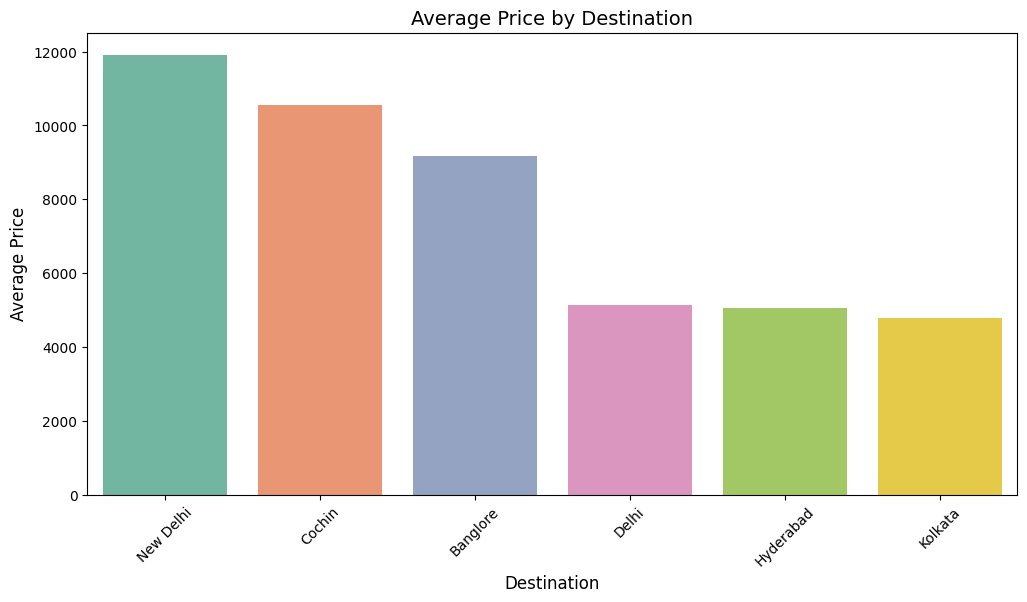

In [185]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Destination', y='Price', data=average_prices, palette='Set2')
plt.title('Average Price by Destination', fontsize=14)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
categories_list = ['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata']
df['Destination'] = df['Destination'].astype(pd.CategoricalDtype(categories=categories_list))
Destination = pd.get_dummies(df['Destination']).astype(int)
Destination.head()

,Cochin,Banglore,Delhi,New Delhi,Hyderabad,Kolkata
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


In [187]:
df["Route"].value_counts()

Route
DEL ? BOM ? COK          2376
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: count, Length: 128, dtype: int64

In [ ]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [189]:
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [ ]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df.head()

C:\Users\91773\AppData\Local\Temp\ipykernel_18092\18744093.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,NaN,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,NaN,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [ ]:
df_airplane = pd.concat([df, Airline, Source, Destination], axis=1)
df_airplane.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)


In [192]:
df_airplane.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Delhi,Kolkata,Mumbai,Bangalore,Cochin,Banglore,Delhi,New Delhi,Hyderabad,Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,1,0,0,0,1,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,1,0,0,0,1,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,1,0,0,0,1,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


In [193]:
df_airplane.shape

(10682, 33)

In [194]:
df_airplane.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Jet Airways', 'IndiGo', 'Air India',
       'Multiple carriers', 'SpiceJet', 'Vistara', 'Air Asia', 'GoAir',
       'Multiple carriers Premium economy', 'Jet Airways Business',
       'Vistara Premium economy', 'Trujet', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Bangalore', 'Cochin', 'Banglore', 'Delhi', 'New Delhi',
       'Hyderabad', 'Kolkata'],
      dtype='object')

In [195]:
X=df_airplane.drop(["Price"],axis=1)
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Jet Airways,...,Delhi,Kolkata,Mumbai,Bangalore,Cochin,Banglore,Delhi,New Delhi,Hyderabad,Kolkata
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,0,...,0,1,0,0,0,1,0,0,0,0
2,2,9,6,9,25,4,25,19,0,1,...,1,0,0,0,1,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,1,0,0,0,1,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,1,0,0


In [196]:
y=df_airplane['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

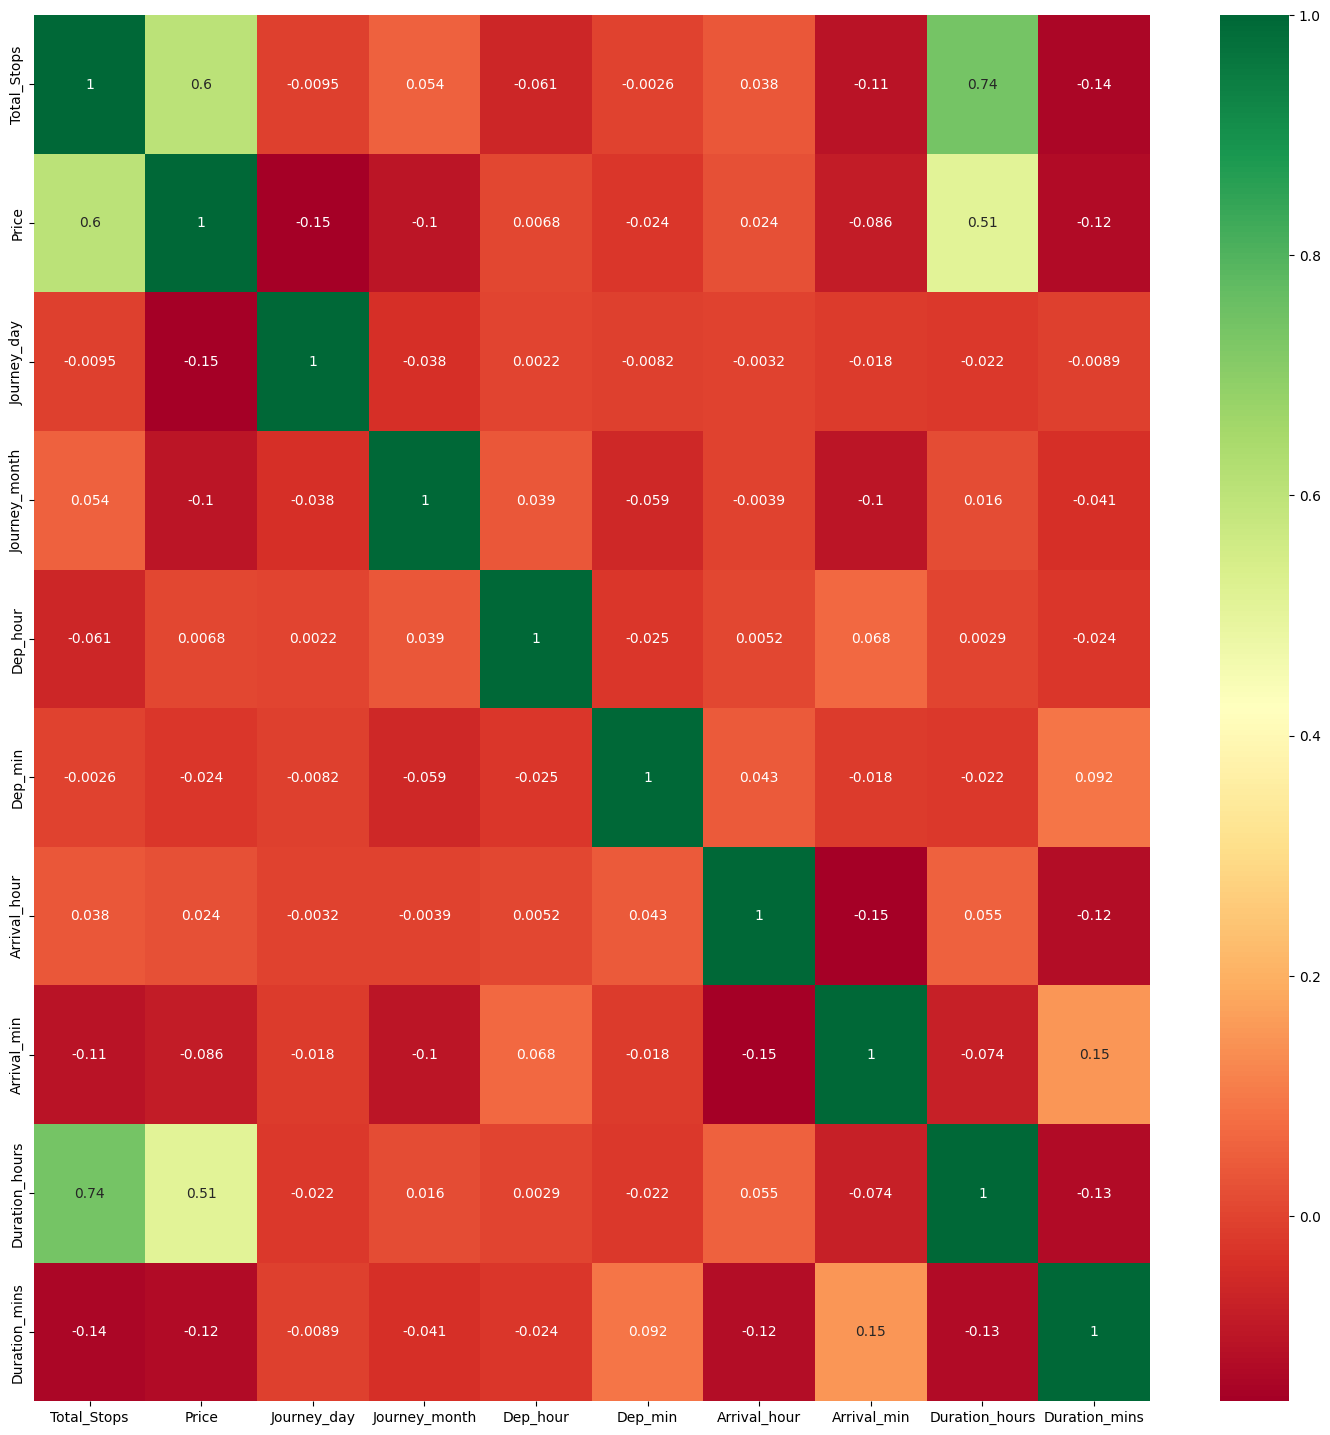

In [197]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

**Modeling:**

Splitting the data

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

print("----------------------------------------------------")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R² Score: {r2_score(y_test, y_pred)}")
print("-------------------------------------------------------------------")

----------------------------------------------------
Mean Absolute Error (MAE): 1174.5230276467798
Mean Squared Error (MSE): 4401090.513925325
Root Mean Squared Error (RMSE): 2097.8776212937983
R² Score: 0.7958872545475361
-------------------------------------------------------------------


Hyperparameter Tuning


In [201]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
               'max_features': ['sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10]}

In [209]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [210]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   4.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   9.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   3.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   4.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   4.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [211]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [212]:
prediction = rf_random.predict(X_test)

In [213]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', root_mean_squared_error(y_test, prediction))


MAE: 1301.4321154137413
MSE: 3964037.9452044405
RMSE: 1990.989187616156


Pickle

In [ ]:
import pickle
file = open('flight_rf.pkl', 'wb')
pickle.dump(reg_rf, file)

In [215]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [216]:
y_prediction = forest.predict(X_test)

In [217]:
r2_score(y_test, y_prediction)

0.7958872545475361